In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
df=pd.read_csv('/content/KNNAlgorithmDataset.csv')

In [96]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [98]:
df=df.drop(columns=['Unnamed: 32','id'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


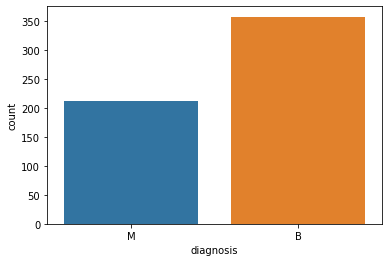

In [99]:
sns.countplot(df['diagnosis']);

In [100]:
df=pd.get_dummies(df,{'diagnosis'})
df.tail()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,1
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1,0


In [101]:
df.corr()['diagnosis_B']

radius_mean               -0.730029
texture_mean              -0.415185
perimeter_mean            -0.742636
area_mean                 -0.708984
smoothness_mean           -0.358560
compactness_mean          -0.596534
concavity_mean            -0.696360
concave points_mean       -0.776614
symmetry_mean             -0.330499
fractal_dimension_mean     0.012838
radius_se                 -0.567134
texture_se                 0.008303
perimeter_se              -0.556141
area_se                   -0.548236
smoothness_se              0.067016
compactness_se            -0.292999
concavity_se              -0.253730
concave points_se         -0.408042
symmetry_se                0.006522
fractal_dimension_se      -0.077972
radius_worst              -0.776454
texture_worst             -0.456903
perimeter_worst           -0.782914
area_worst                -0.733825
smoothness_worst          -0.421465
compactness_worst         -0.590998
concavity_worst           -0.659610
concave points_worst      -0

In [102]:
x=df.drop(['diagnosis_B','diagnosis_M'],axis=1)
y=df['diagnosis_B']

In [103]:
x.shape , y.shape

((569, 30), (569,))

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [105]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
train_accuracy=[]
test_accuracy=[]

for k in range(2,25):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)

  train_accuracy.append(knn.score(x_train,y_train))
  test_accuracy.append(knn.score(x_test,y_test))

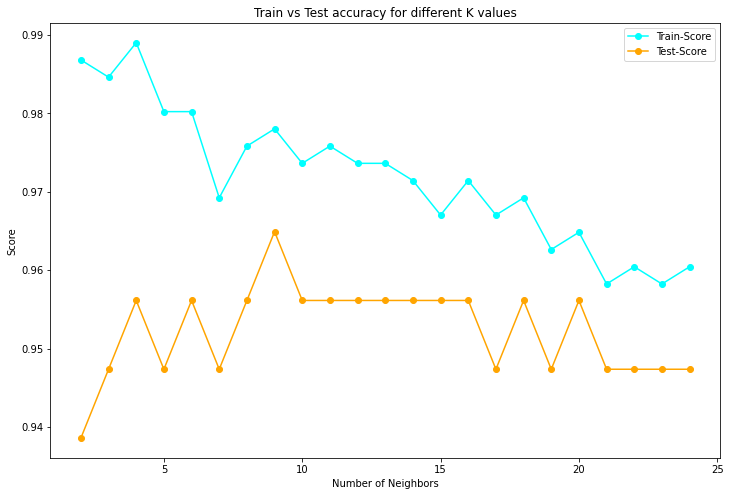

In [108]:
plt.figure(figsize=(12,8))

plt.plot(range(2,25),train_accuracy,marker="o",label="Train-Score",color="aqua")
plt.plot(range(2,25),test_accuracy,marker="o",label="Test-Score",color="orange")

plt.title("Train vs Test accuracy for different K values")
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.legend()
plt.show()

Test Accuracy is the highest for k=9, so we consider k=9



In [129]:
model=KNeighborsClassifier(n_neighbors=9)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [130]:
y_pred= model.predict(x_test)

In [131]:
from sklearn.metrics import classification_report,accuracy_score,plot_roc_curve,plot_confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9649122807017544
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


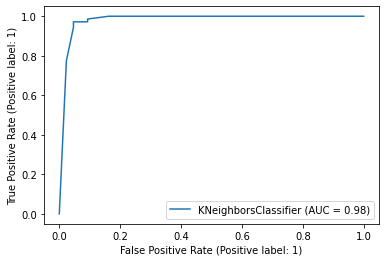

In [112]:
plot_roc_curve(model,x_test,y_test);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


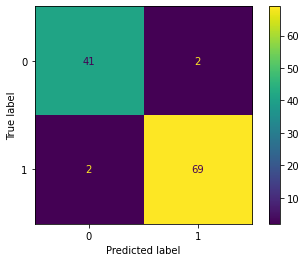

In [113]:
plot_confusion_matrix(model,x_test,y_test)